In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import pandas as pd

[4.99999999 3.         3.        ]
[-1.42981106e+06  1.00000000e+00  1.72677757e+02]
3.7269449679189215e-20
13911412.03960576


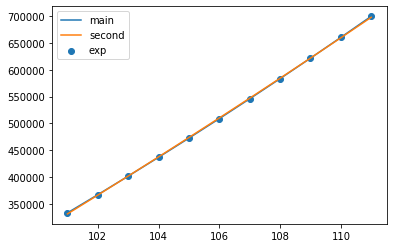

In [25]:
data = np.genfromtxt("./dataTempAndPressure.csv")
temp = np.genfromtxt("./tempData.csv")
pressure = np.genfromtxt("./pressureData.csv")

def fixData(arr):
    newData = []
    for i in range(1, len(arr)):
        newData.append(arr[i])
    return np.array(newData)
data = fixData(data)
temp = fixData(temp)
pressure = fixData(pressure)

def mainModel(coeffs, P, T):
    return coeffs[0] + coeffs[1] * T + coeffs[2] * T * P

def secondModel(coeffs, P, T):
    return coeffs[0] + coeffs[2] * T ** 2

def residuals(coeffs, func, P, T, data):
    return data - func(coeffs, P, T)

coeffsGuess = [1, 1, 1]
coeffsOpt, _ = leastsq(residuals, coeffsGuess, args=(mainModel, pressure, temp, data))
coeffsOpt2, _ = leastsq(residuals, coeffsGuess, args=(secondModel, pressure, temp, data))

def minSquare(func, coeffsOpt):
    return sum((func(coeffsOpt, pressure, temp) - data) ** 2)

print(coeffsOpt)
print(coeffsOpt2)
print(minSquare(mainModel, coeffsOpt))
print(minSquare(secondModel, coeffsOpt2))
plt.scatter(temp, data, label='exp')
plt.plot(temp, mainModel(coeffsOpt, pressure, temp,), label='main')
plt.plot(temp, secondModel(coeffsOpt2, pressure, temp), label='second')
plt.legend()

